<a href="https://colab.research.google.com/github/mansh2060/Bitcoin-Price-Predictor/blob/main/Bitcoin_Price-predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('bitcoinprice.csv')

In [36]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2024-01-01 00:00:00+00:00,44167.33203,44167.33203,44175.43750,42214.97656,42280.23438,18426978443
1,2024-01-02 00:00:00+00:00,44957.96875,44957.96875,45899.70703,44176.94922,44187.14063,39335274536
2,2024-01-03 00:00:00+00:00,42848.17578,42848.17578,45503.24219,40813.53516,44961.60156,46342323118
3,2024-01-04 00:00:00+00:00,44179.92188,44179.92188,44770.02344,42675.17578,42855.81641,30448091210
4,2024-01-05 00:00:00+00:00,44162.69141,44162.69141,44353.28516,42784.71875,44192.98047,32336029347


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       338 non-null    object 
 1   Adj Close  338 non-null    float64
 2   Close      338 non-null    float64
 3   High       338 non-null    float64
 4   Low        338 non-null    float64
 5   Open       338 non-null    float64
 6   Volume     338 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.6+ KB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       338 non-null    object 
 1   Adj Close  338 non-null    float64
 2   Close      338 non-null    float64
 3   High       338 non-null    float64
 4   Low        338 non-null    float64
 5   Open       338 non-null    float64
 6   Volume     338 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.6+ KB


In [39]:
df['Date']=pd.to_datetime(df['Date'])

In [59]:
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df['day'] =df['Date'].dt.day
df['day_of_week'] =df['Date'].dt.day_of_week
df['is_weekend']=(df['Date'].dt.day_of_week>5).astype(int)
#df['is_weekend'].astype(int)

In [62]:
df=df.drop(columns=['Date'])

In [63]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,year,month,day,day_of_week,is_weekend
0,44167.33203,44167.33203,44175.43750,42214.97656,42280.23438,18426978443,2024,1,1,0,0
1,44957.96875,44957.96875,45899.70703,44176.94922,44187.14063,39335274536,2024,1,2,1,0
2,42848.17578,42848.17578,45503.24219,40813.53516,44961.60156,46342323118,2024,1,3,2,0
3,44179.92188,44179.92188,44770.02344,42675.17578,42855.81641,30448091210,2024,1,4,3,0
4,44162.69141,44162.69141,44353.28516,42784.71875,44192.98047,32336029347,2024,1,5,4,0


In [ ]:
df.info()

In [ ]:
#pairplot
sns.pairplot(df)



In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [87]:
x=df[['High','Low','Open','Volume']]
y=df[['Adj Close']]

In [88]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression
mult_regression=LinearRegression()
mult_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=mult_regression.predict(x_test)
print(y_pred)

In [91]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rscore=r2_score(y_test,y_pred)

In [92]:
print(f'Mean squared error is {mse} and r square error is {rscore}')

Mean squared error is 424567.2700229451 and r square error is 0.9972299316100347


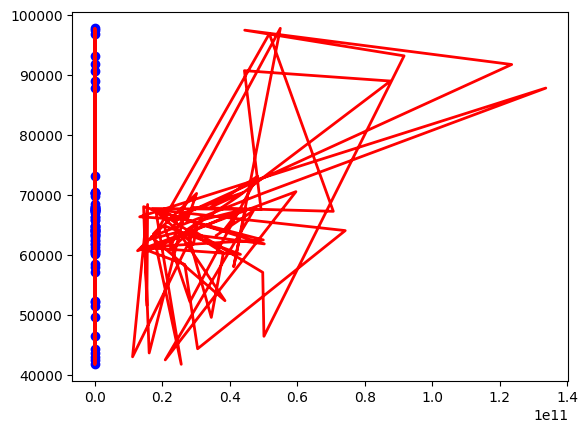

In [93]:
plt.scatter(y_test,y_pred,color='blue',label='Actual data')
plt.plot(x_test,y_pred,color='red',linewidth=2,label='RegressionLine')

In [100]:
high=int(input("Enter Today High        :"))
low=int(input("Enter Today Low          :"))
open=int(input("Enter Today Open        :"))
volume=int(input("Enter Today Volume    :"))
value_array=np.array([[high,low,open,volume]])


Enter Today High        :97016
Enter Today Low          :94871
Enter Today Open        :95936
Enter Today Volume    :61071679488


In [ ]:
predicted_close=mult_regression.predict(value_array)
print(predicted_close)